# Notebook to better understand datasets

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from torch_geometric_temporal.dataset import METRLADatasetLoader

import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1. METR-LA


### 1.1. Raw data set

In [2]:
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader

loader = METRLADatasetLoader()
dataset_metrola = loader.get_dataset(num_timesteps_in=1000, num_timesteps_out=100)

/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>

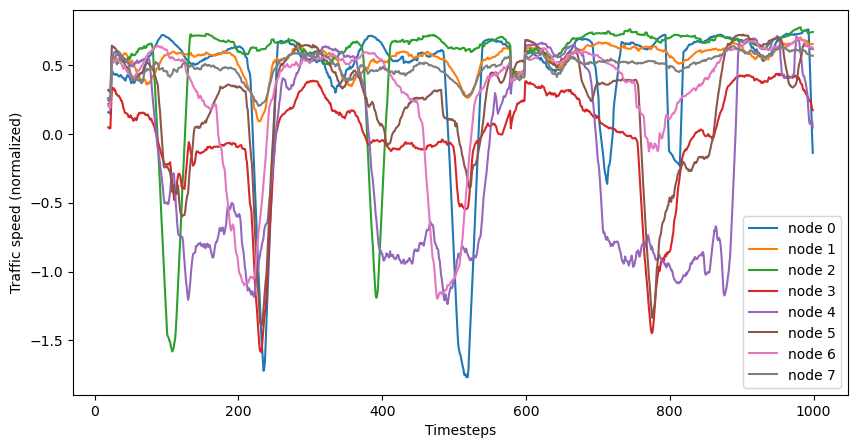

In [30]:
plt.figure(figsize=(10, 5))
for node_idx in range(8):
    plt.plot(pd.Series(dataset_metrola[0].x[node_idx, 0, :].T).rolling(window=20).mean(), label=f'node {node_idx}')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Traffic speed (normalized)')
plt.show()


### 1.2. Same data set as used for current training runs

In [1]:
import sys
sys.path.append('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/')
from importlib import reload
from model import dataset
reload(dataset)
from model.dataset import create_dataloaders
from omegaconf import OmegaConf
import pandas as pd
import torch

cfg = OmegaConf.load('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/metrla.yaml'))
# cfg.train.max_len = 200
train_loader, val_loader, test_loader, topo_data, metadata = create_dataloaders(cfg, raw_data_dir='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data')

/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Dataloaders and Topology Data Overview:
Batch size: 16
----------------------------------------------------------
Name                 | Samples      | Batches     
----------------------------------------------------------
Train Loader         | 30824        | 1926        
Val Loader           | 3424         | 214         

Topology Data:
Number of nodes: 207
Number of edges: 1722
----------------------------------------------------------


### Check missing data ratio

In [29]:
a = torch.stack([train_loader.dataset[i][0][:, 0] for i in range(30000)]).T

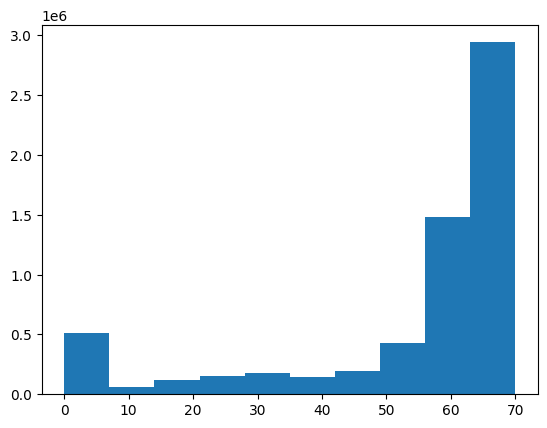

In [30]:
a = a * metadata['norm_std'] + metadata['norm_mean']

from matplotlib import pyplot as plt
plt.hist(a.flatten())
plt.show()

In [35]:
torch.sum(a==0)/a.numel()

tensor(0.0807)

### Check scales

In [25]:

a = torch.stack([train_loader.dataset[i][1] for i in range(4500)])
pd.Series(a.flatten()).describe()


count    1.117800e+07
mean     1.452529e-02
std      9.903865e-01
min     -2.652154e+00
25%     -1.730197e-02
50%      4.403954e-01
75%      6.259484e-01
max      8.115013e-01
dtype: float64

In [ ]:
# Without normalisation:
# count    1.117800e+07
# mean     5.524937e+01
# std      1.843342e+01
# min      0.000000e+00
# 25%      5.488889e+01
# 50%      6.275000e+01
# 75%      6.633334e+01
# max      7.000000e+01
# dtype: float64

### Check what the second feature is

In [1]:
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader

loader = METRLADatasetLoader()
dataset_metrola = loader.get_dataset(num_timesteps_in=1000, num_timesteps_out=100)

/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


self.means=array([53.59967  ,  0.4982691], dtype=float32)
self.stds=array([20.209862  ,  0.28815305], dtype=float32)


In [42]:
list(filter(lambda x: not x.startswith('_'), dir(dataset_metrola)))

['additional_feature_keys',
 'edge_index',
 'edge_weight',
 'features',
 'snapshot_count',
 'targets']

(array([24012., 24012., 24012., 23184., 22356., 18009., 17388., 18009.,
        18009., 18009.]),
 array([0.        , 0.09965278, 0.19930556, 0.29895833, 0.39861113,
        0.4982639 , 0.59791666, 0.69756943, 0.79722226, 0.89687502,
        0.99652779]),
 <BarContainer object of 10 artists>)

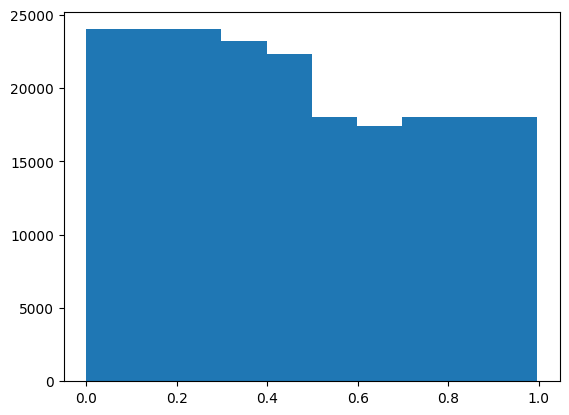

In [6]:
# self.means=array([53.59967  ,  0.4982691], dtype=float32)
# self.stds=array([20.209862  ,  0.28815305], dtype=float32)

from matplotlib import pyplot as plt
b = dataset_metrola.features[0][:, 1, :]
b = b * 0.28815305 + 0.4982691
plt.hist(b.flatten())

### Misc

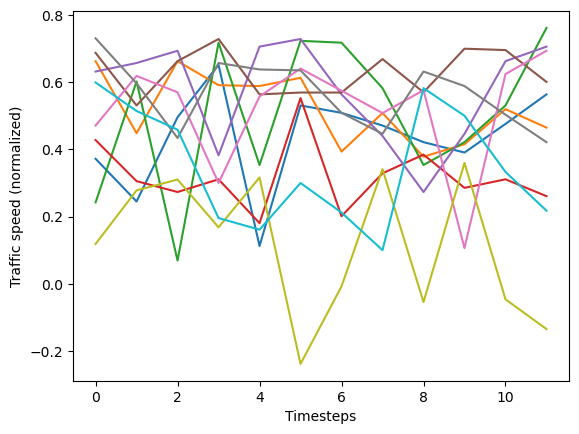

In [124]:
import torch

n_nodes = 10
a = torch.stack([train_loader.dataset[i].y[:n_nodes, 0] for i in range(int(cfg.train.max_len*cfg.train.train_size))])
plt.plot(train_loader.dataset[0].y[:n_nodes, :].T)
plt.xlabel('Timesteps')
plt.ylabel('Traffic speed (normalized)')
plt.show()


## Dev for new dataset pipeline

In [ ]:
## Config building
"""
Need:
- dataset params (should use HDTTS settings)
- window params
"""


In [3]:
import sys
sys.path.append('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1')
from hdtts_dataset_creation.dataset_util import load_dataset, load_synthetic_dataset
from hdtts_dataset_creation import PvUS, EngRad
from omegaconf import OmegaConf
import numpy as np
from model.dataset import create_sliding_window_dataset
from tsl.ops.connectivity import adj_to_edge_index
import os
from train.configs.utils import load_config


In [10]:
from importlib import reload
import model.dataset as dataset
reload(dataset)
from model.dataset import get_data_raw

dataset = 'mso'
cfg = load_config(configs_dir='/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/configs', dataset_name=dataset)

x, y, x_synth_missing, y_synth_missing, mask_x, mask_y, mask_x_synth_missing, mask_y_synth_missing, edge_index, edge_weight, n_nodes, metadata = get_data_raw(cfg, root='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data_HDTTS')


ConfigAttributeError: Missing key mode
    full_key: raw_data.mode
    object_type=dict

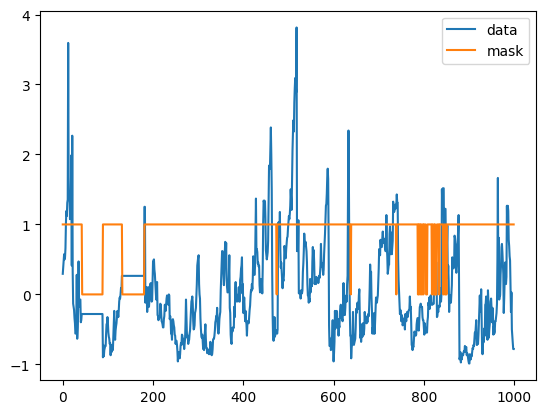

In [8]:
from matplotlib import pyplot as plt
i = 10
plt.plot(x_synth_missing[:1000, i, 0], label='data')
plt.plot(mask_x_synth_missing[:1000, i, 0], label='mask')
plt.legend()
plt.show()

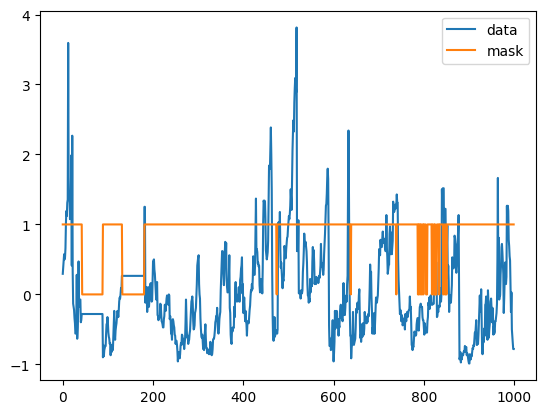

In [9]:
from matplotlib import pyplot as plt
i = 10
plt.plot(x[:1000, i, 0], label='data')
plt.plot(mask_x[:1000, i, 0], label='mask')
plt.legend()
plt.show()

In [64]:
mask_y.shape

(34248, 207, 12)

In [54]:
pd.Series(mask_x.flatten()).value_counts(), pd.Series(mask_y.flatten()).value_counts()

(1.0    44934975
 0.0    40137057
 Name: count, dtype: int64,
 1.0    44927351
 0.0    40144681
 Name: count, dtype: int64)

In [44]:
x.shape, y.shape

((34248, 207, 12, 2), (34248, 207, 12, 2))

In [37]:
data = data.squeeze()

In [39]:
data = data[..., None]
data_combined = np.concatenate([data, mask], axis=-1)
data_combined.shape

(34272, 207, 2)

In [7]:
import pandas as pd
pd.Series(dataset.mask.flatten()).value_counts()


True     6519002
False     575302
Name: count, dtype: int64

Text(0, 0.5, 'Average missing value ratio')

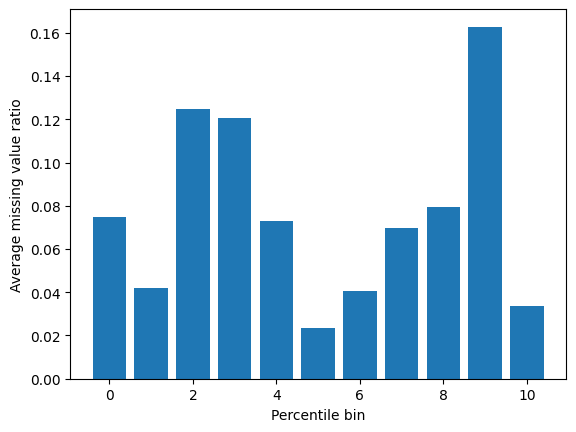

In [20]:
from matplotlib import pyplot as plt
mask_sums = dataset.mask.sum(axis=1).flatten()
n_bins = 10
bin_size = len(mask_sums) // n_bins
bin_averages = 1 - np.array([mask_sums[i:i+bin_size].mean() for i in range(0, len(mask_sums), bin_size)])/207
plt.bar(range(len(bin_averages)), bin_averages)
plt.xlabel('Percentile bin')
plt.ylabel('Average missing value ratio')
# plt.plot(dataset.mask.sum(axis=1).flatten())

In [4]:
from importlib import reload
import model.dataset as dataset
reload(dataset)
from model.dataset import create_dataloaders

dataset = 'air'
cfg = load_config(configs_dir='/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/configs', dataset_name=dataset)

train_loader, val_loader, test_loader, topo_data, metadata = create_dataloaders(cfg, raw_data_dir='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data', num_workers=1)

download: 0.00B [00:00, ?B/s]

download: 31.4MB [00:01, 19.6MB/s]                            



Dataloaders and Topology Data Overview:
Batch size: 8
----------------------------------------------------------
Name                 | Samples      | Batches     
----------------------------------------------------------
Train Loader         | 6111         | 763         
Val Loader           | 873          | 109         
Test Loader          | 1746         | 218         

Topology Data:
Number of nodes: 437
Number of edges: 5460
----------------------------------------------------------


In [5]:
mem_x = train_loader.dataset.dataset.x.element_size() * train_loader.dataset.dataset.x.nelement()
mem_y = train_loader.dataset.dataset.y.element_size() * train_loader.dataset.dataset.y.nelement()
mem_mask_x = train_loader.dataset.dataset.mask_x.element_size() * train_loader.dataset.dataset.mask_x.nelement()
mem_mask_y = train_loader.dataset.dataset.mask_y.element_size() * train_loader.dataset.dataset.mask_y.nelement()
mem_mask_y_synth = train_loader.dataset.dataset.mask_y_synth.element_size() * train_loader.dataset.dataset.mask_y_synth.nelement()

print(f'x: {mem_x / 1e9:.2f} GB')
print(f'y: {mem_y / 1e9:.2f} GB')
print(f'mask_x: {mem_mask_x / 1e9:.2f} GB')
print(f'mask_y: {mem_mask_y / 1e9:.2f} GB')
print(f'mask_y_synth: {mem_mask_y_synth / 1e9:.2f} GB')
print(f'Total: {(mem_x + mem_y + mem_mask_x + mem_mask_y + mem_mask_y_synth) / 1e9:.2f} GB')


x: 0.37 GB
y: 0.09 GB
mask_x: 0.09 GB
mask_y: 0.02 GB
mask_y_synth: 0.02 GB
Total: 0.60 GB


In [6]:
metadata

{'norm_mean': 70.015594, 'norm_std': 67.88963}

In [30]:
batch = next(iter(train_loader))
x, y, mask_x, mask_y, mask_y_synth = batch
x.shape, y.shape, mask_x.shape, mask_y.shape, mask_y_synth.shape

(torch.Size([16, 207, 12]),
 torch.Size([16, 207, 12]),
 torch.Size([16, 207, 12]),
 torch.Size([16, 207, 12]),
 torch.Size([16, 207, 12]))

## Graph topology 

In [58]:
from importlib import reload
import model.dataset as dataset
reload(dataset)
from model.dataset import create_dataloaders

dataset = 'pvus'
cfg = load_config(configs_dir='/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/configs', dataset_name=dataset)

train_loader, val_loader, test_loader, topo_data, metadata = create_dataloaders(cfg, raw_data_dir='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data', num_workers=1)

/mnt/cephfs/store/gr-mc2473/lc865/misc/condaforge/envs/ml-gnn/lib/python3.10/site-packages/tsl/datasets/prototypes/casting.py:72: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = pd_freq.to_offset(freq)



Dataloaders and Topology Data Overview:
Batch size: 4
----------------------------------------------------------
Name                 | Samples      | Batches     
----------------------------------------------------------
Train Loader         | 18343        | 4585        
Val Loader           | 2620         | 655         
Test Loader          | 5241         | 1310        

Topology Data:
Number of nodes: 1081
Number of edges: 10560
----------------------------------------------------------


Patch diameter statistics:
Mean: 0.00
Std: 0.00
Min: 0
Max: 0


Text(0, 0.5, 'Count')

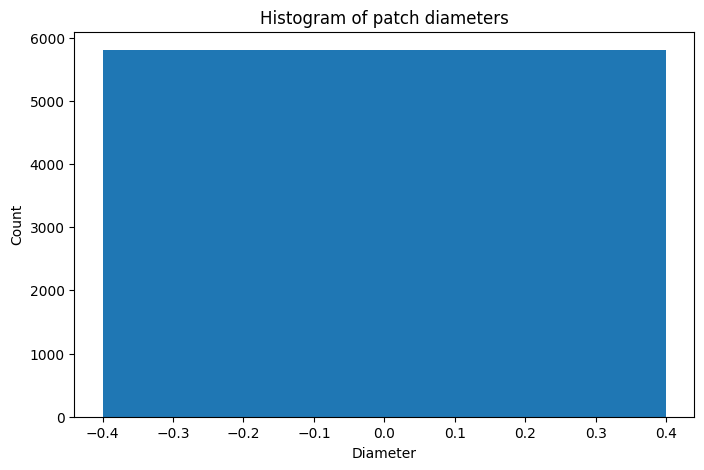

In [65]:
import networkx as nx
import numpy as np

# Convert edge_index and edge_weight to NetworkX graph
edge_list = list(zip(topo_data.edge_index[0].numpy(), topo_data.edge_index[1].numpy(), topo_data.edge_weight.numpy()))
G = nx.Graph()
G.add_weighted_edges_from(edge_list)

# Get subgraphs for each patch
patch_diameters = []
for patch_nodes in topo_data.subgraphs_nodes_mapper:
    # Extract subgraph for this patch
    patch_nodes = patch_nodes.numpy()
    # Convert 0-d array to list of nodes
    if patch_nodes.ndim == 0:
        patch_nodes = [int(patch_nodes)]
    else:
        patch_nodes = patch_nodes.tolist()
        
    subgraph = G.subgraph(patch_nodes)
    
    # Calculate diameter if subgraph is connected
    if nx.is_connected(subgraph):
        diameter = nx.diameter(subgraph)
    else:
        # For disconnected graphs, get diameter of largest component
        components = list(nx.connected_components(subgraph))
        max_component = max(components, key=len)
        diameter = nx.diameter(subgraph.subgraph(max_component))
    patch_diameters.append(diameter)

# Print statistics
diameters = np.array(patch_diameters)
print(f"Patch diameter statistics:")
print(f"Mean: {diameters.mean():.2f}")
print(f"Std: {diameters.std():.2f}") 
print(f"Min: {diameters.min()}")
print(f"Max: {diameters.max()}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(diameters, bins='auto', rwidth=0.8)
plt.title("Histogram of patch diameters")
plt.xlabel("Diameter")
plt.ylabel("Count")


Text(0.5, 1.0, 'Histogram of number of nodes in each patch')

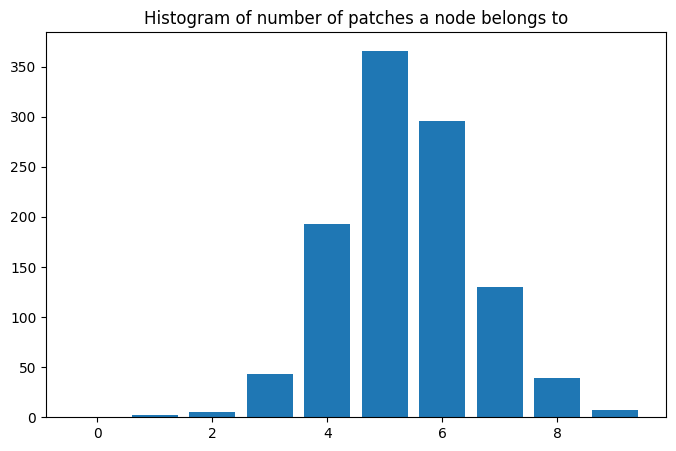

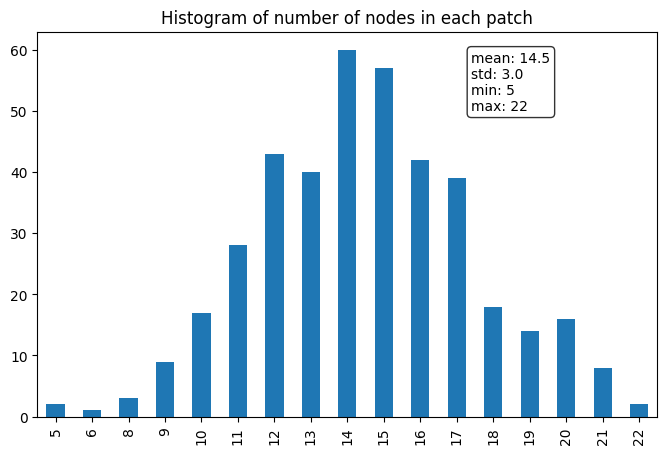

In [63]:
from matplotlib import pyplot as plt
import pandas as pd

subgraph_count = topo_data.subgraphs_batch.max()
patch_node_map = [topo_data.subgraphs_nodes_mapper[topo_data.subgraphs_batch == i] for i in range(subgraph_count)]

plt.figure(figsize=(8, 5))
patch_counts = pd.Series(topo_data.subgraphs_nodes_mapper).value_counts()
patch_counts.hist(grid=False, align='left', bins=range(0, max(patch_counts)+2), rwidth=0.8)
plt.title("Histogram of number of patches a node belongs to")

plt.figure(figsize=(8, 5))
pd.Series([len(p) for p in patch_node_map]).value_counts().sort_index().plot(kind='bar')
# Get statistics
node_counts = pd.Series([len(p) for p in patch_node_map])
stats = node_counts.describe()

# Add stats text to plot
stats_text = f"mean: {stats['mean']:.1f}\nstd: {stats['std']:.1f}\nmin: {stats['min']:.0f}\nmax: {stats['max']:.0f}"
plt.text(0.7, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title("Histogram of number of nodes in each patch")